# 수집할 종목 정하기

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

In [2]:
# 종목토론방 자료 수집할 종목코드 가져오기 (이마트)
item_code = "139480"

# URL 가져오기
url = f"https://finance.naver.com/item/board.nhn?code=139480&page=1"

# requests 라이브러리로 페이지 텍스트 가져오기

In [3]:
headers = {"user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 Edg/88.0.705.68"}
response = requests.get(url, headers = headers)
response.text

'<script type="text/javascript">\nfunction doSearch() {\n\tvar frm = document.boardSearchFrm;\n\tvar str = frm.sw.value;\n\tstr = str.replace(/^\\s*/,\'\').replace(/\\s*$/,\'\');\t// trim\n\t\n\tif(str == \'\') {\n\t\talert("검색어를 입력해 주세요.");\n\t\tfrm.sw.value = \'\';\n\t\tfrm.sw.focus();\n\t}\n\telse {\n\t\tfrm.sw.value = str;\n\t\tfrm.submit();\n\t}\n}\n</script>\n\n<!--  global include -->\n\n\t\n\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\t<title>이마트 : 네이버 금융</title>\n\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n\n\n\n\n\n\t\n\t\t<meta property="og:title" content="네이버 금융"/>\n\t\t<meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n\t\t<meta property="og:url" content="https://finance.naver.com"/>\n\t\t<meta property="og:description" content="국내 해외 

# Beautiful Soup을 통한 table 태그 찾기

In [4]:
html = bs(response.text)
html

<html><head><script type="text/javascript">
function doSearch() {
	var frm = document.boardSearchFrm;
	var str = frm.sw.value;
	str = str.replace(/^\s*/,'').replace(/\s*$/,'');	// trim
	
	if(str == '') {
		alert("검색어를 입력해 주세요.");
		frm.sw.value = '';
		frm.sw.focus();
	}
	else {
		frm.sw.value = str;
		frm.submit();
	}
}
</script>
<!--  global include -->
<title>이마트 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 금융" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" pr

In [5]:
tables = html.select("table")
tables

[<table class="no_info" summary="주요 시세(전일종가, 시고저가, 거래량, 거래대금)을 제공합니다.">
 <caption>주요 시세</caption>
 <colgroup><col/><col width="214"/><col width="157"/></colgroup>
 <tr>
 <td class="first">
 <span class="sptxt sp_txt2">전일</span>
 <em>
 <span class="blind">189,000</span>
 <span class="no1">1</span><span class="no8">8</span><span class="no9">9</span><span class="shim">,</span><span class="no0">0</span><span class="no0">0</span><span class="no0">0</span>
 </em>
 </td>
 <td>
 <span class="sptxt sp_txt4">고가</span>
 <em class="no_up">
 <span class="blind">191,000</span><span class="no1">1</span><span class="no9">9</span><span class="no1">1</span><span class="shim">,</span><span class="no0">0</span><span class="no0">0</span><span class="no0">0</span>
 </em>
 <span class="sptxt sp_txt6">(상한가</span>
 <em class="no_cha">
 <span class="blind">245,500</span><span class="no2">2</span><span class="no4">4</span><span class="no5">5</span><span class="shim">,</span><span class="no5">5</span><span class=

# pandas 코드로 데이터 수집하기

In [6]:
table = pd.read_html(str(tables), encoding = "cp949")

In [7]:
# 정보가 없는 'Unnamed: 6' 컬럼 삭제
table = table[1].drop('Unnamed: 6', axis = 1)
table

,날짜,제목,글쓴이,조회,공감,비공감
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.02.17 22:48,"방역과 피해는 개인, 칭찬은 문재인, 공...",defe****,42.0,1.0,1.0
2,2021.02.17 21:49,오늘은 영 힘을 못?네요,qort****,86.0,1.0,0.0
3,2021.02.17 21:19,가슴에 손을 얹고 [1],high****,485.0,4.0,0.0
4,2021.02.17 19:02,문재인 저 나쁜놈. 왜 거리두기를 완화해... [2],defe****,222.0,4.0,11.0
5,2021.02.17 18:26,간만에 노래나 부르자~ ㅋㅋ,defe****,136.0,0.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN
7,2021.02.17 18:23,오르나~ 내리나~~,defe****,82.0,0.0,0.0
8,2021.02.17 18:17,내일 20만~,defe****,188.0,0.0,0.0
9,2021.02.17 17:54,감사합니다~,defe****,99.0,0.0,0.0


In [8]:
# NaN이 포함된 row 삭제
df = table.dropna()
df

,날짜,제목,글쓴이,조회,공감,비공감
1,2021.02.17 22:48,"방역과 피해는 개인, 칭찬은 문재인, 공...",defe****,42.0,1.0,1.0
2,2021.02.17 21:49,오늘은 영 힘을 못?네요,qort****,86.0,1.0,0.0
3,2021.02.17 21:19,가슴에 손을 얹고 [1],high****,485.0,4.0,0.0
4,2021.02.17 19:02,문재인 저 나쁜놈. 왜 거리두기를 완화해... [2],defe****,222.0,4.0,11.0
5,2021.02.17 18:26,간만에 노래나 부르자~ ㅋㅋ,defe****,136.0,0.0,1.0
7,2021.02.17 18:23,오르나~ 내리나~~,defe****,82.0,0.0,0.0
8,2021.02.17 18:17,내일 20만~,defe****,188.0,0.0,0.0
9,2021.02.17 17:54,감사합니다~,defe****,99.0,0.0,0.0
10,2021.02.17 17:51,냉철이 털었음? [2],capp****,409.0,0.0,0.0
11,2021.02.17 17:26,날아가자,redf****,104.0,0.0,0.0


In [9]:
# 게시글 리스트 페이지별로 수집하는 함수 만들기
def get_day_list(item_code, page_no):
    url = f"https://finance.naver.com/item/board.nhn?code={item_code}&page={page_no}"
    headers = {"user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 Edg/88.0.705.68"}
    response = requests.get(url, headers=headers)
    html = bs(response.text, "lxml")
    table = html.select("table")
    table = pd.read_html(str(table))
    temp = table[1].drop('Unnamed: 6', axis = 1).dropna()
    return temp

In [10]:
# 함수 잘 만들어졌는지 확인
get_day_list(item_code, 3)

,날짜,제목,글쓴이,조회,공감,비공감
1,2021.02.17 11:18,오늘은,kkj2****,90.0,0.0,0.0
2,2021.02.17 11:09,너만 오늘 빨간불 되면..,nice****,206.0,1.0,0.0
3,2021.02.17 10:54,개인이 죽어라사는거보니 떡낙하긋네,cast****,168.0,0.0,1.0
4,2021.02.17 10:35,재매수,ans2****,171.0,0.0,1.0
5,2021.02.17 10:31,이마트 vs 월마트,audr****,225.0,0.0,1.0
7,2021.02.17 10:26,씨버 이틀을 못가네,sion****,144.0,0.0,1.0
8,2021.02.17 09:53,외국기관연기금 [1],gmld****,785.0,4.0,1.0
9,2021.02.17 09:47,오래들 묵혀서 그런가,wind****,266.0,0.0,1.0
10,2021.02.17 09:44,물리신분?? [2],gjs9****,678.0,2.0,1.0
11,2021.02.17 09:30,오후엔 빨간불,kkin****,227.0,4.0,1.0


In [11]:
# 20페이지 데이터까지 가져오기
import time

page_no = 1
item_list = []

while True:
    print(page_no)
    temp = get_day_list(item_code, page_no)
    item_list.append(temp)
    page_no = page_no + 1
    time.sleep(0.1)
    
    if page_no > 40:
        break;

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [12]:
item_list[5]

,날짜,제목,글쓴이,조회,공감,비공감
1,2021.02.16 13:49,호재? [2],njih****,730.0,0.0,0.0
2,2021.02.16 13:46,종가 19 찍겠는데? [2],toge****,431.0,0.0,0.0
3,2021.02.16 13:32,"189,000에 샀는데 존버해야하나요 ㅠ... [5]",bles****,1796.0,3.0,0.0
4,2021.02.16 13:21,야구단때문에 [4],west****,784.0,4.0,4.0
5,2021.02.16 13:20,나 조개누나가 니들에게 말해두 니네들 못... [1],whsd****,293.0,0.0,2.0
7,2021.02.16 13:12,조만간 리포트 나온다면,sowe****,221.0,0.0,0.0
8,2021.02.16 13:11,야구단 샀다고 욕했던거 반성한다.,dkdl****,246.0,3.0,0.0
9,2021.02.16 12:22,신세계 i&c 갑니다 [4],23ga****,1093.0,1.0,2.0
10,2021.02.16 12:17,오늘 종가에 팔아? 말아? [3],nice****,1352.0,0.0,0.0
11,2021.02.16 12:01,쿠팡가치 50조,jyki****,388.0,2.0,0.0


# 수집한 데이터 하나로 합치기

In [13]:
df = pd.concat(item_list)
df.head(10)

,날짜,제목,글쓴이,조회,공감,비공감
1,2021.02.17 22:48,"방역과 피해는 개인, 칭찬은 문재인, 공...",defe****,42.0,1.0,1.0
2,2021.02.17 21:49,오늘은 영 힘을 못?네요,qort****,86.0,1.0,0.0
3,2021.02.17 21:19,가슴에 손을 얹고 [1],high****,485.0,4.0,0.0
4,2021.02.17 19:02,문재인 저 나쁜놈. 왜 거리두기를 완화해... [2],defe****,222.0,4.0,11.0
5,2021.02.17 18:26,간만에 노래나 부르자~ ㅋㅋ,defe****,136.0,0.0,1.0
7,2021.02.17 18:23,오르나~ 내리나~~,defe****,82.0,0.0,0.0
8,2021.02.17 18:17,내일 20만~,defe****,188.0,0.0,0.0
9,2021.02.17 17:54,감사합니다~,defe****,99.0,0.0,0.0
10,2021.02.17 17:51,냉철이 털었음? [2],capp****,409.0,0.0,0.0
11,2021.02.17 17:26,날아가자,redf****,104.0,0.0,0.0


# 필요한 형태로 가공하기

In [14]:
df['연월일'] = df['날짜'].astype(str).str[:10]
df

,날짜,제목,글쓴이,조회,공감,비공감,연월일
1,2021.02.17 22:48,"방역과 피해는 개인, 칭찬은 문재인, 공...",defe****,42.0,1.0,1.0,2021.02.17
2,2021.02.17 21:49,오늘은 영 힘을 못?네요,qort****,86.0,1.0,0.0,2021.02.17
3,2021.02.17 21:19,가슴에 손을 얹고 [1],high****,485.0,4.0,0.0,2021.02.17
4,2021.02.17 19:02,문재인 저 나쁜놈. 왜 거리두기를 완화해... [2],defe****,222.0,4.0,11.0,2021.02.17
5,2021.02.17 18:26,간만에 노래나 부르자~ ㅋㅋ,defe****,136.0,0.0,1.0,2021.02.17
...,...,...,...,...,...,...,...
19,2021.01.28 11:13,오너는 네이버 게시판 안봄,eroh****,116.0,2.0,0.0,2021.01.28
20,2021.01.28 11:06,이번주는 글럿고 다음주에 17.3정도 갈...,ch74****,149.0,2.0,0.0,2021.01.28
21,2021.01.28 11:03,잘 해보려고 하는건데 너무 욕하지는 말자,pros****,105.0,2.0,1.0,2021.01.28
22,2021.01.28 10:59,너무들 떨지들 말고 ㅋ 이거 읽어봐~,ch74****,289.0,1.0,0.0,2021.01.28


In [15]:
df['시간'] = df['날짜'].astype(str).str[11:13]
df

,날짜,제목,글쓴이,조회,공감,비공감,연월일,시간
1,2021.02.17 22:48,"방역과 피해는 개인, 칭찬은 문재인, 공...",defe****,42.0,1.0,1.0,2021.02.17,22
2,2021.02.17 21:49,오늘은 영 힘을 못?네요,qort****,86.0,1.0,0.0,2021.02.17,21
3,2021.02.17 21:19,가슴에 손을 얹고 [1],high****,485.0,4.0,0.0,2021.02.17,21
4,2021.02.17 19:02,문재인 저 나쁜놈. 왜 거리두기를 완화해... [2],defe****,222.0,4.0,11.0,2021.02.17,19
5,2021.02.17 18:26,간만에 노래나 부르자~ ㅋㅋ,defe****,136.0,0.0,1.0,2021.02.17,18
...,...,...,...,...,...,...,...,...
19,2021.01.28 11:13,오너는 네이버 게시판 안봄,eroh****,116.0,2.0,0.0,2021.01.28,11
20,2021.01.28 11:06,이번주는 글럿고 다음주에 17.3정도 갈...,ch74****,149.0,2.0,0.0,2021.01.28,11
21,2021.01.28 11:03,잘 해보려고 하는건데 너무 욕하지는 말자,pros****,105.0,2.0,1.0,2021.01.28,11
22,2021.01.28 10:59,너무들 떨지들 말고 ㅋ 이거 읽어봐~,ch74****,289.0,1.0,0.0,2021.01.28,10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 23
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      800 non-null    object 
 1   제목      800 non-null    object 
 2   글쓴이     800 non-null    object 
 3   조회      800 non-null    float64
 4   공감      800 non-null    float64
 5   비공감     800 non-null    float64
 6   연월일     800 non-null    object 
 7   시간      800 non-null    object 
dtypes: float64(3), object(5)
memory usage: 56.2+ KB


In [17]:
df['연월일'] = pd.to_datetime(df['연월일'])
df

,날짜,제목,글쓴이,조회,공감,비공감,연월일,시간
1,2021.02.17 22:48,"방역과 피해는 개인, 칭찬은 문재인, 공...",defe****,42.0,1.0,1.0,2021-02-17,22
2,2021.02.17 21:49,오늘은 영 힘을 못?네요,qort****,86.0,1.0,0.0,2021-02-17,21
3,2021.02.17 21:19,가슴에 손을 얹고 [1],high****,485.0,4.0,0.0,2021-02-17,21
4,2021.02.17 19:02,문재인 저 나쁜놈. 왜 거리두기를 완화해... [2],defe****,222.0,4.0,11.0,2021-02-17,19
5,2021.02.17 18:26,간만에 노래나 부르자~ ㅋㅋ,defe****,136.0,0.0,1.0,2021-02-17,18
...,...,...,...,...,...,...,...,...
19,2021.01.28 11:13,오너는 네이버 게시판 안봄,eroh****,116.0,2.0,0.0,2021-01-28,11
20,2021.01.28 11:06,이번주는 글럿고 다음주에 17.3정도 갈...,ch74****,149.0,2.0,0.0,2021-01-28,11
21,2021.01.28 11:03,잘 해보려고 하는건데 너무 욕하지는 말자,pros****,105.0,2.0,1.0,2021-01-28,11
22,2021.01.28 10:59,너무들 떨지들 말고 ㅋ 이거 읽어봐~,ch74****,289.0,1.0,0.0,2021-01-28,10


In [18]:
# 날짜별 게시글수 확인하기
days = df.groupby('연월일')['연월일'].value_counts().to_frame()
days.columns = ["날짜별 게시글수"]
days = days.reset_index(level=0, drop=True)
days

,날짜별 게시글수
연월일,
2021-01-28,67
2021-01-29,66
2021-01-30,9
2021-01-31,19
2021-02-01,30
2021-02-02,42
2021-02-03,70
2021-02-04,30
2021-02-05,30


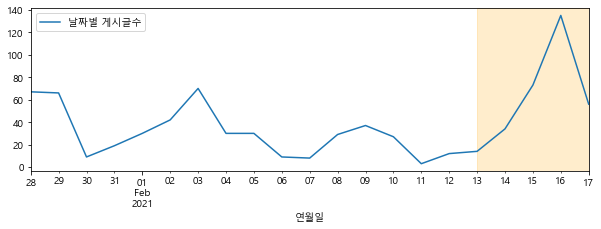

In [19]:
# 쿠팡의 나스닥 상장이 발표된 2월 13일을 기점으로 이커머스 관련주인 이마트 종목토론방도 활성화
ax = days.plot(figsize = (10, 3))
ax = ax.axvspan('2021.02.13', '2021.02.17', color='orange', alpha=0.2)

In [20]:
# 시간대별 게시글수 확인하기
times = df.groupby('시간')['시간'].value_counts().to_frame()
times.columns = ["시간대별 게시글수"]
times["시간대별 게시글수"] = times["시간대별 게시글수"].astype(int)
times = times.reset_index(level=0, drop=True)

In [21]:
times.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00 to 23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   시간대별 게시글수  24 non-null     int32
dtypes: int32(1)
memory usage: 288.0+ bytes


<AxesSubplot:xlabel='시간'>

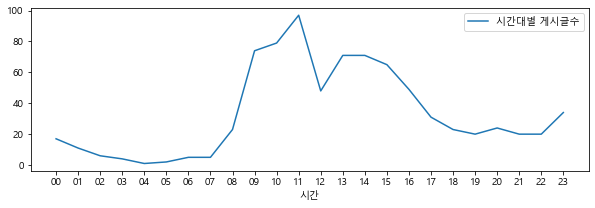

In [22]:
# 오전 8시부터 11시까지는 게시글 수가 증가하다가 점심시간에는 감소하는 모습을 보임
times.plot(figsize = (10, 3), xticks = np.arange(0, 24, 1))